<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/FII_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install yfinance

In [73]:

import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=Warning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd

nifty=yf.download('^NSEI',start='2018-08-08')
nif=nifty.reset_index()

import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator

content='https://raw.githubusercontent.com/anirbanghoshsbi/data/main/'

data1=pd.read_csv(content+'fii1.txt',sep='\t',header=None)
data2=pd.read_csv(content+'fii2.txt',sep='\t',header=None)
data3=pd.read_csv(content+'fii3.txt',sep='\t',header=None)
data4=pd.read_csv(content+'fii4.txt',sep='\t',header=None)
data5=pd.read_csv(content+'fii5.txt',sep='\t',header=None)
data6=pd.read_csv(content+'fii6.txt',sep='\t',header=None)
data7=pd.read_csv(content+'fii7.txt',sep='\t',header=None)
data8=pd.read_csv(content+'fii8.txt',sep='\t',header=None)

data=[]

data=data1[0].tolist()
data.extend(data2[0].tolist())
data.extend(data3[0].tolist())
data.extend(data4[0].tolist())
data.extend(data5[0].tolist())
data.extend(data6[0].tolist())
data.extend(data7[0].tolist())
data.extend(data8[0].tolist())

len(data)

lst=[]
lst.append(data[0:7])

for i in range(7,len(data)):
  if i%7==0:
    #print(i)
    lst.append(data[i:i+7])

df=pd.DataFrame()

for item in lst:
  to_append=item
  a_series = pd.Series(to_append)
  df = df.append(a_series, ignore_index=True)

df.to_csv('fii.csv')

fii_fig= pd.read_csv('/content/fii.csv')



fii_fig=fii_fig[::-1]

fii_fig.columns =['Index','Date','FIIcall','FIIput','FIIFuture','FIIFutOI','FIICash','DIIcash']
#fii.columns =['Index','Date','FIIcall','FIIput','FIIFuture','FIIFutOI','FIICash','DIIcash']

fii_fig.drop('Index',inplace=True,axis=1)

fii_fig=fii_fig.set_index('Date')




fii_fig['Total_Cash']=fii_fig.FIICash+fii_fig.DIIcash











[*********************100%***********************]  1 of 1 completed


In [74]:
"""# Plot FII minus DII"""
# Conbined
fii_fig['macd_combined']=fii_fig['Total_Cash'].ewm(span=50, adjust=False).mean()-fii_fig['Total_Cash'].ewm(span=100, adjust=False).mean()
fii_fig['signal_combined']=fii_fig['macd_combined'].ewm(span=25,adjust=False).mean()

# FII
fii_fig['macd_FII']=fii_fig['FIICash'].ewm(span=50, adjust=False).mean()-fii_fig['FIICash'].ewm(span=100, adjust=False).mean()
fii_fig['signal_FII']=fii_fig['macd_FII'].ewm(span=25,adjust=False).mean()

# DII
fii_fig['macd_DII']=fii_fig['DIIcash'].ewm(span=50, adjust=False).mean()-fii_fig['DIIcash'].ewm(span=100, adjust=False).mean()
fii_fig['signal_DII']=fii_fig['macd_DII'].ewm(span=25,adjust=False).mean()




In [75]:
fii_fig['fsig_fii']=np.where(fii_fig['macd_FII']>fii_fig['signal_FII'],1,0)
fii_fig['fsig_dom']=np.where(fii_fig['macd_DII']>fii_fig['signal_DII'],1,0)
fii_fig['fsig_combined']=np.where(fii_fig['macd_combined']>fii_fig['signal_combined'],1,0)

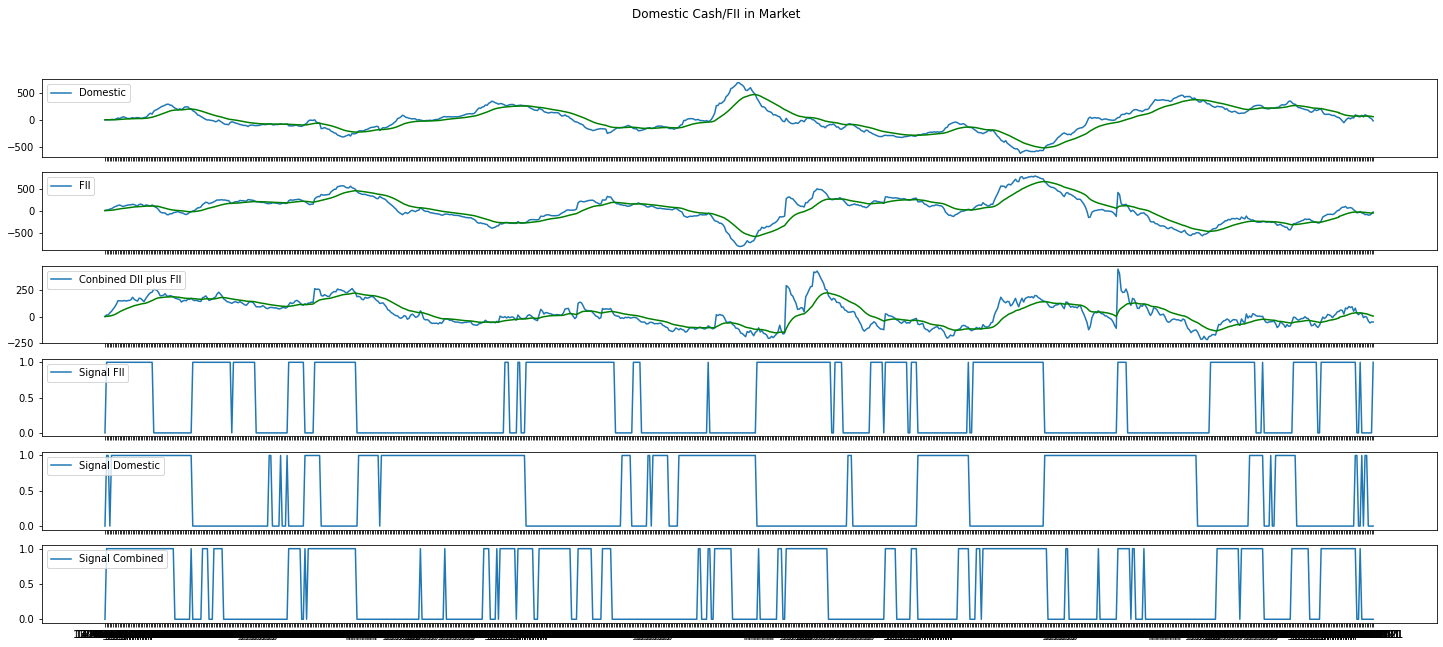

In [76]:
"""# Plot FII , DII , Difference comparison"""

fig,ax=plt.subplots(6,1,figsize=(25,10),sharex=True)
ax[0].plot(fii_fig['macd_DII'], label='Domestic')
ax[0].plot(fii_fig['signal_DII'],color='g')
ax[2].plot(fii_fig['macd_combined'],label='Conbined DII plus FII')
ax[2].plot(fii_fig['signal_combined'],color='g')

#plt.plot(fii_fig.loc[:, :].index)
ax[1].plot(fii_fig['macd_FII'],label='FII')
ax[1].plot(fii_fig['signal_FII'],color='g')
# plot signals

ax[3].plot(fii_fig['fsig_fii'],label='Signal FII')
ax[4].plot(fii_fig['fsig_dom'],label='Signal Domestic')
ax[5].plot(fii_fig['fsig_combined'],label='Signal Combined')
#plt.plot(fii_fig.loc[:, :].index)
plt.suptitle('Domestic Cash/FII in Market')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')
plt.show()


In [77]:
fii_fig.tail(2)

,FIIcall,FIIput,FIIFuture,FIIFutOI,FIICash,DIIcash,Total_Cash,macd_combined,signal_combined,macd_FII,signal_FII,macd_DII,signal_DII,fsig_fii,fsig_dom,fsig_combined
Date,,,,,,,,,,,,,,,,
13 Oct 2021,16.2,-14.1,1205,12854,937,-432,505,-51.490124,8.621512,-72.969370,-55.492655,21.479246,64.114167,0,0,0
14 Oct 2021,-3.2,-0.1,1327,13807,1682,-1751,-69,-52.698392,3.904597,-33.133207,-53.772698,-19.565185,57.677294,1,0,0


In [79]:
fii_fig[['fsig_fii','fsig_dom','fsig_combined']].to_csv('fii_signals.csv')